# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
                Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
                
# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [40]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install imblearn -U

You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [53]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
data_1=pd.read_csv(r"D:\Datatrained Project\IBM_HR_Attrition_Rate_Analytics-master\HR data.csv")
data_1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Performing EDA 

In [5]:
data_1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data_1.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
data_1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data_1.shape

(1470, 35)

As the data has no null value so we don't have to use fillna method

In [9]:
#checking the summary of the data 
data_1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There is no empty data

In [10]:
#checking the number of columns 
data_1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
#checking the unquie values for different columns 
data_1.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
#checking the unique values of the some particular columns 
data_1['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [13]:
data_1['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data_1['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [15]:
data_1['DailyRate'].unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

In [16]:
data_1['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
data_1['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [18]:
data_1['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [19]:
#Attrition is important for the company
data_1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Ordinal Enconding

In [20]:
from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()#We are using Ordinal Encoder as this is good for cateogrical data
def ordinal_transform(data,column):
    data[column]=Oe.fit_transform(data[column])
    return data

In [21]:
col=data_1.columns
data_2=ordinal_transform(data_1,col)

In [22]:
data_1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23.0,1.0,2.0,624.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,6.0,4.0,0.0,5.0
1,31.0,0.0,1.0,113.0,1.0,7.0,0.0,1.0,0.0,1.0,...,3.0,0.0,1.0,10.0,3.0,2.0,10.0,7.0,1.0,7.0
2,19.0,1.0,2.0,805.0,1.0,1.0,1.0,4.0,0.0,2.0,...,1.0,0.0,0.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0
3,15.0,0.0,1.0,820.0,1.0,2.0,3.0,1.0,0.0,3.0,...,2.0,0.0,0.0,8.0,3.0,2.0,8.0,7.0,3.0,0.0
4,9.0,0.0,2.0,312.0,1.0,1.0,0.0,3.0,0.0,4.0,...,3.0,0.0,1.0,6.0,3.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18.0,0.0,1.0,494.0,1.0,22.0,1.0,3.0,0.0,1465.0,...,2.0,0.0,1.0,17.0,3.0,2.0,5.0,2.0,0.0,3.0
1466,21.0,0.0,2.0,327.0,1.0,5.0,0.0,3.0,0.0,1466.0,...,0.0,0.0,1.0,9.0,5.0,2.0,7.0,7.0,1.0,7.0
1467,9.0,0.0,2.0,39.0,1.0,3.0,2.0,1.0,0.0,1467.0,...,1.0,0.0,1.0,6.0,0.0,2.0,6.0,2.0,0.0,3.0
1468,31.0,0.0,1.0,579.0,2.0,1.0,2.0,3.0,0.0,1468.0,...,3.0,0.0,0.0,17.0,3.0,1.0,9.0,6.0,0.0,8.0


In [23]:
data_1.shape

(1470, 35)

In [24]:
#Dropping the columns which are not required
data_1.drop(columns =["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis =1, inplace = True)

In [25]:
data_1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23.0,1.0,2.0,624.0,2.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,6.0,4.0,0.0,5.0
1,31.0,0.0,1.0,113.0,1.0,7.0,0.0,1.0,2.0,1.0,...,1.0,3.0,1.0,10.0,3.0,2.0,10.0,7.0,1.0,7.0
2,19.0,1.0,2.0,805.0,1.0,1.0,1.0,4.0,3.0,1.0,...,0.0,1.0,0.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0
3,15.0,0.0,1.0,820.0,1.0,2.0,3.0,1.0,3.0,0.0,...,0.0,2.0,0.0,8.0,3.0,2.0,8.0,7.0,3.0,0.0
4,9.0,0.0,2.0,312.0,1.0,1.0,0.0,3.0,0.0,1.0,...,0.0,3.0,1.0,6.0,3.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18.0,0.0,1.0,494.0,1.0,22.0,1.0,3.0,2.0,1.0,...,0.0,2.0,1.0,17.0,3.0,2.0,5.0,2.0,0.0,3.0
1466,21.0,0.0,2.0,327.0,1.0,5.0,0.0,3.0,3.0,1.0,...,0.0,0.0,1.0,9.0,5.0,2.0,7.0,7.0,1.0,7.0
1467,9.0,0.0,2.0,39.0,1.0,3.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,6.0,0.0,2.0,6.0,2.0,0.0,3.0
1468,31.0,0.0,1.0,579.0,2.0,1.0,2.0,3.0,3.0,1.0,...,0.0,3.0,0.0,17.0,3.0,1.0,9.0,6.0,0.0,8.0


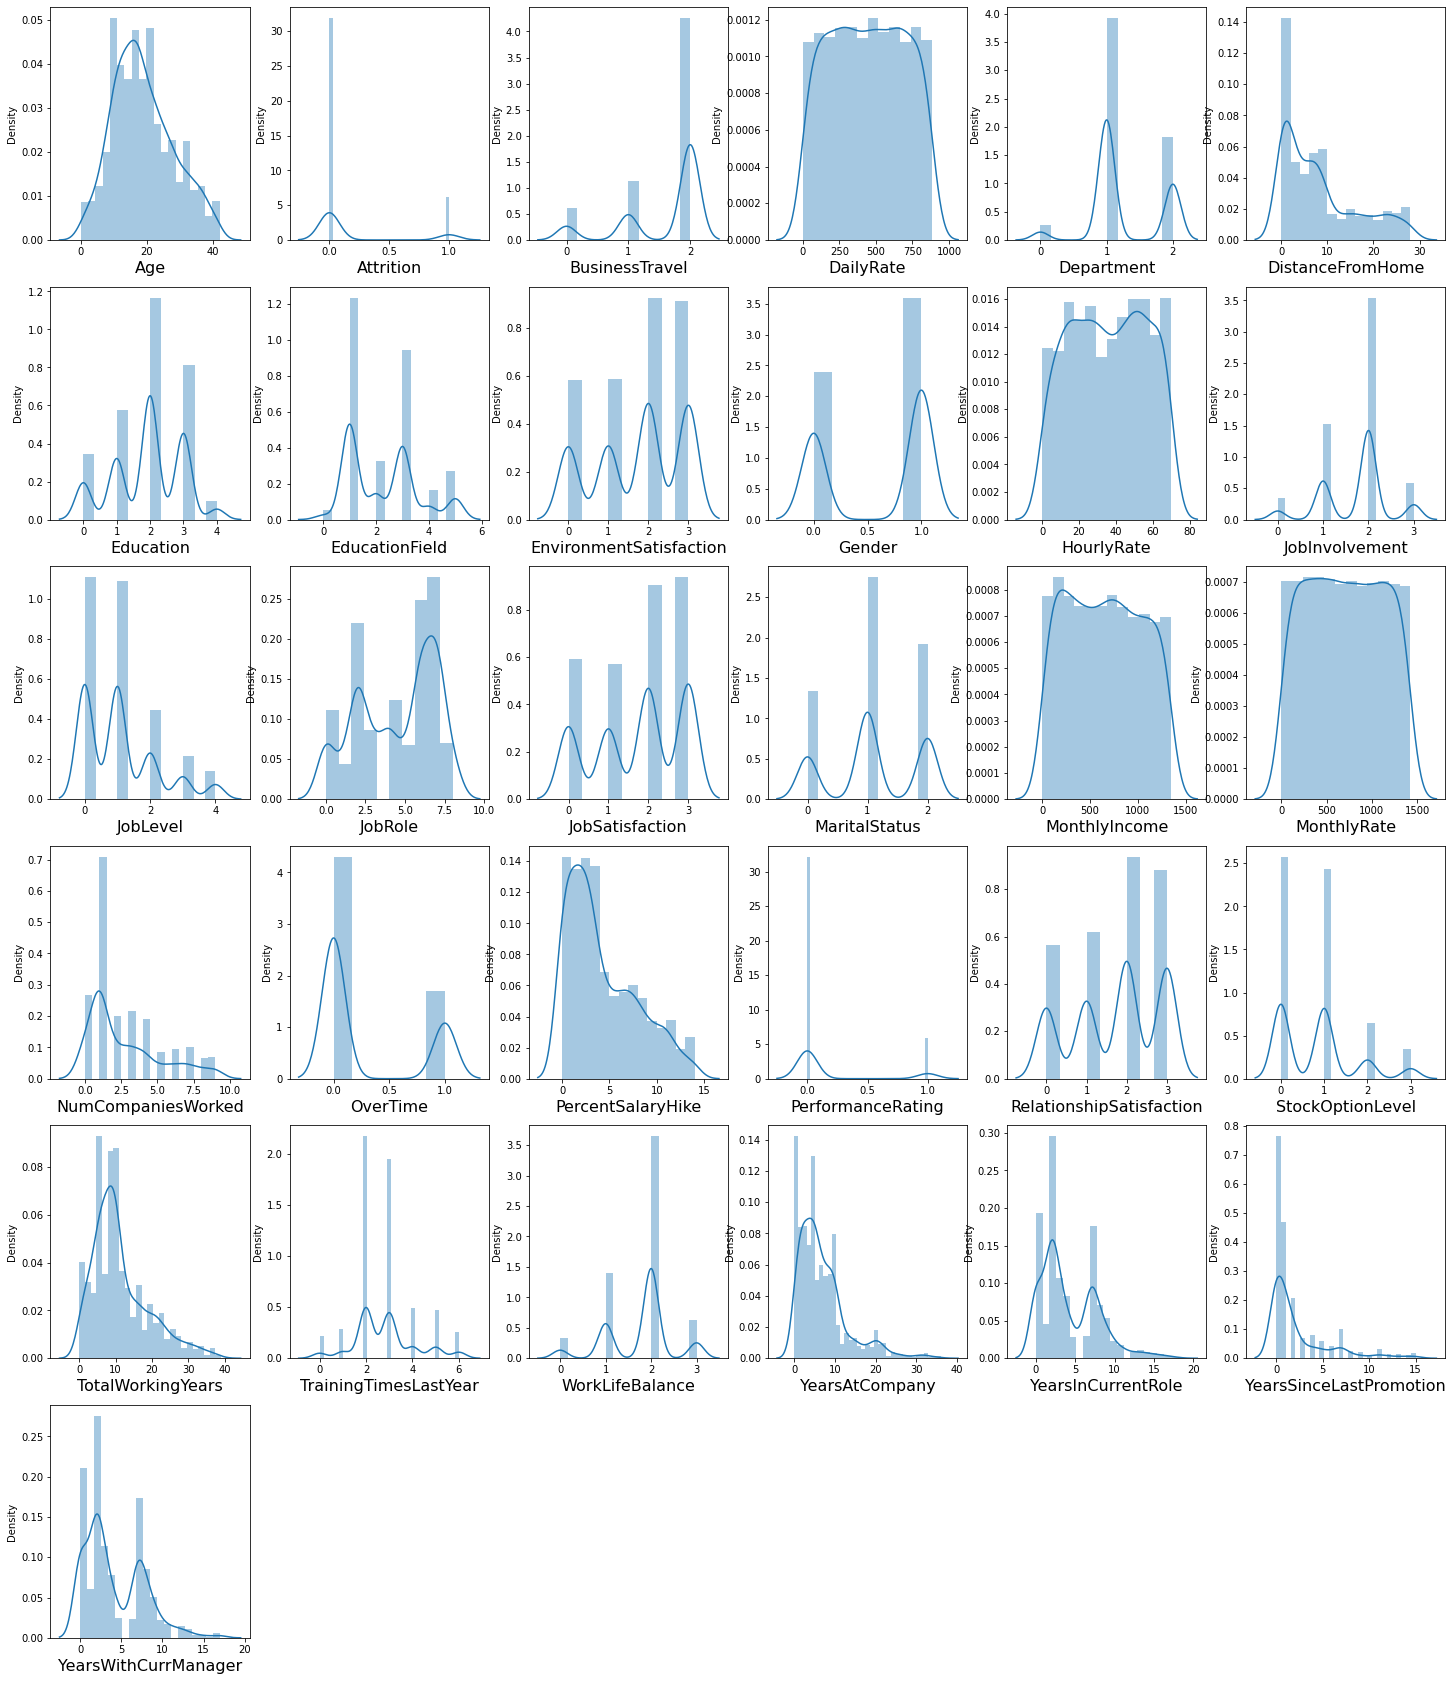

In [26]:
#Performing distribution plot for more analysis
plt.figure(figsize=(25,30))
plotnumber=1

for column in data_1:
    if plotnumber<=36: #as there are 36 columns in data
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(data_1[column])
        plt.xlabel(column,fontsize=16)
    plotnumber +=1
plt.show()

As we can see more skewed columns in the data

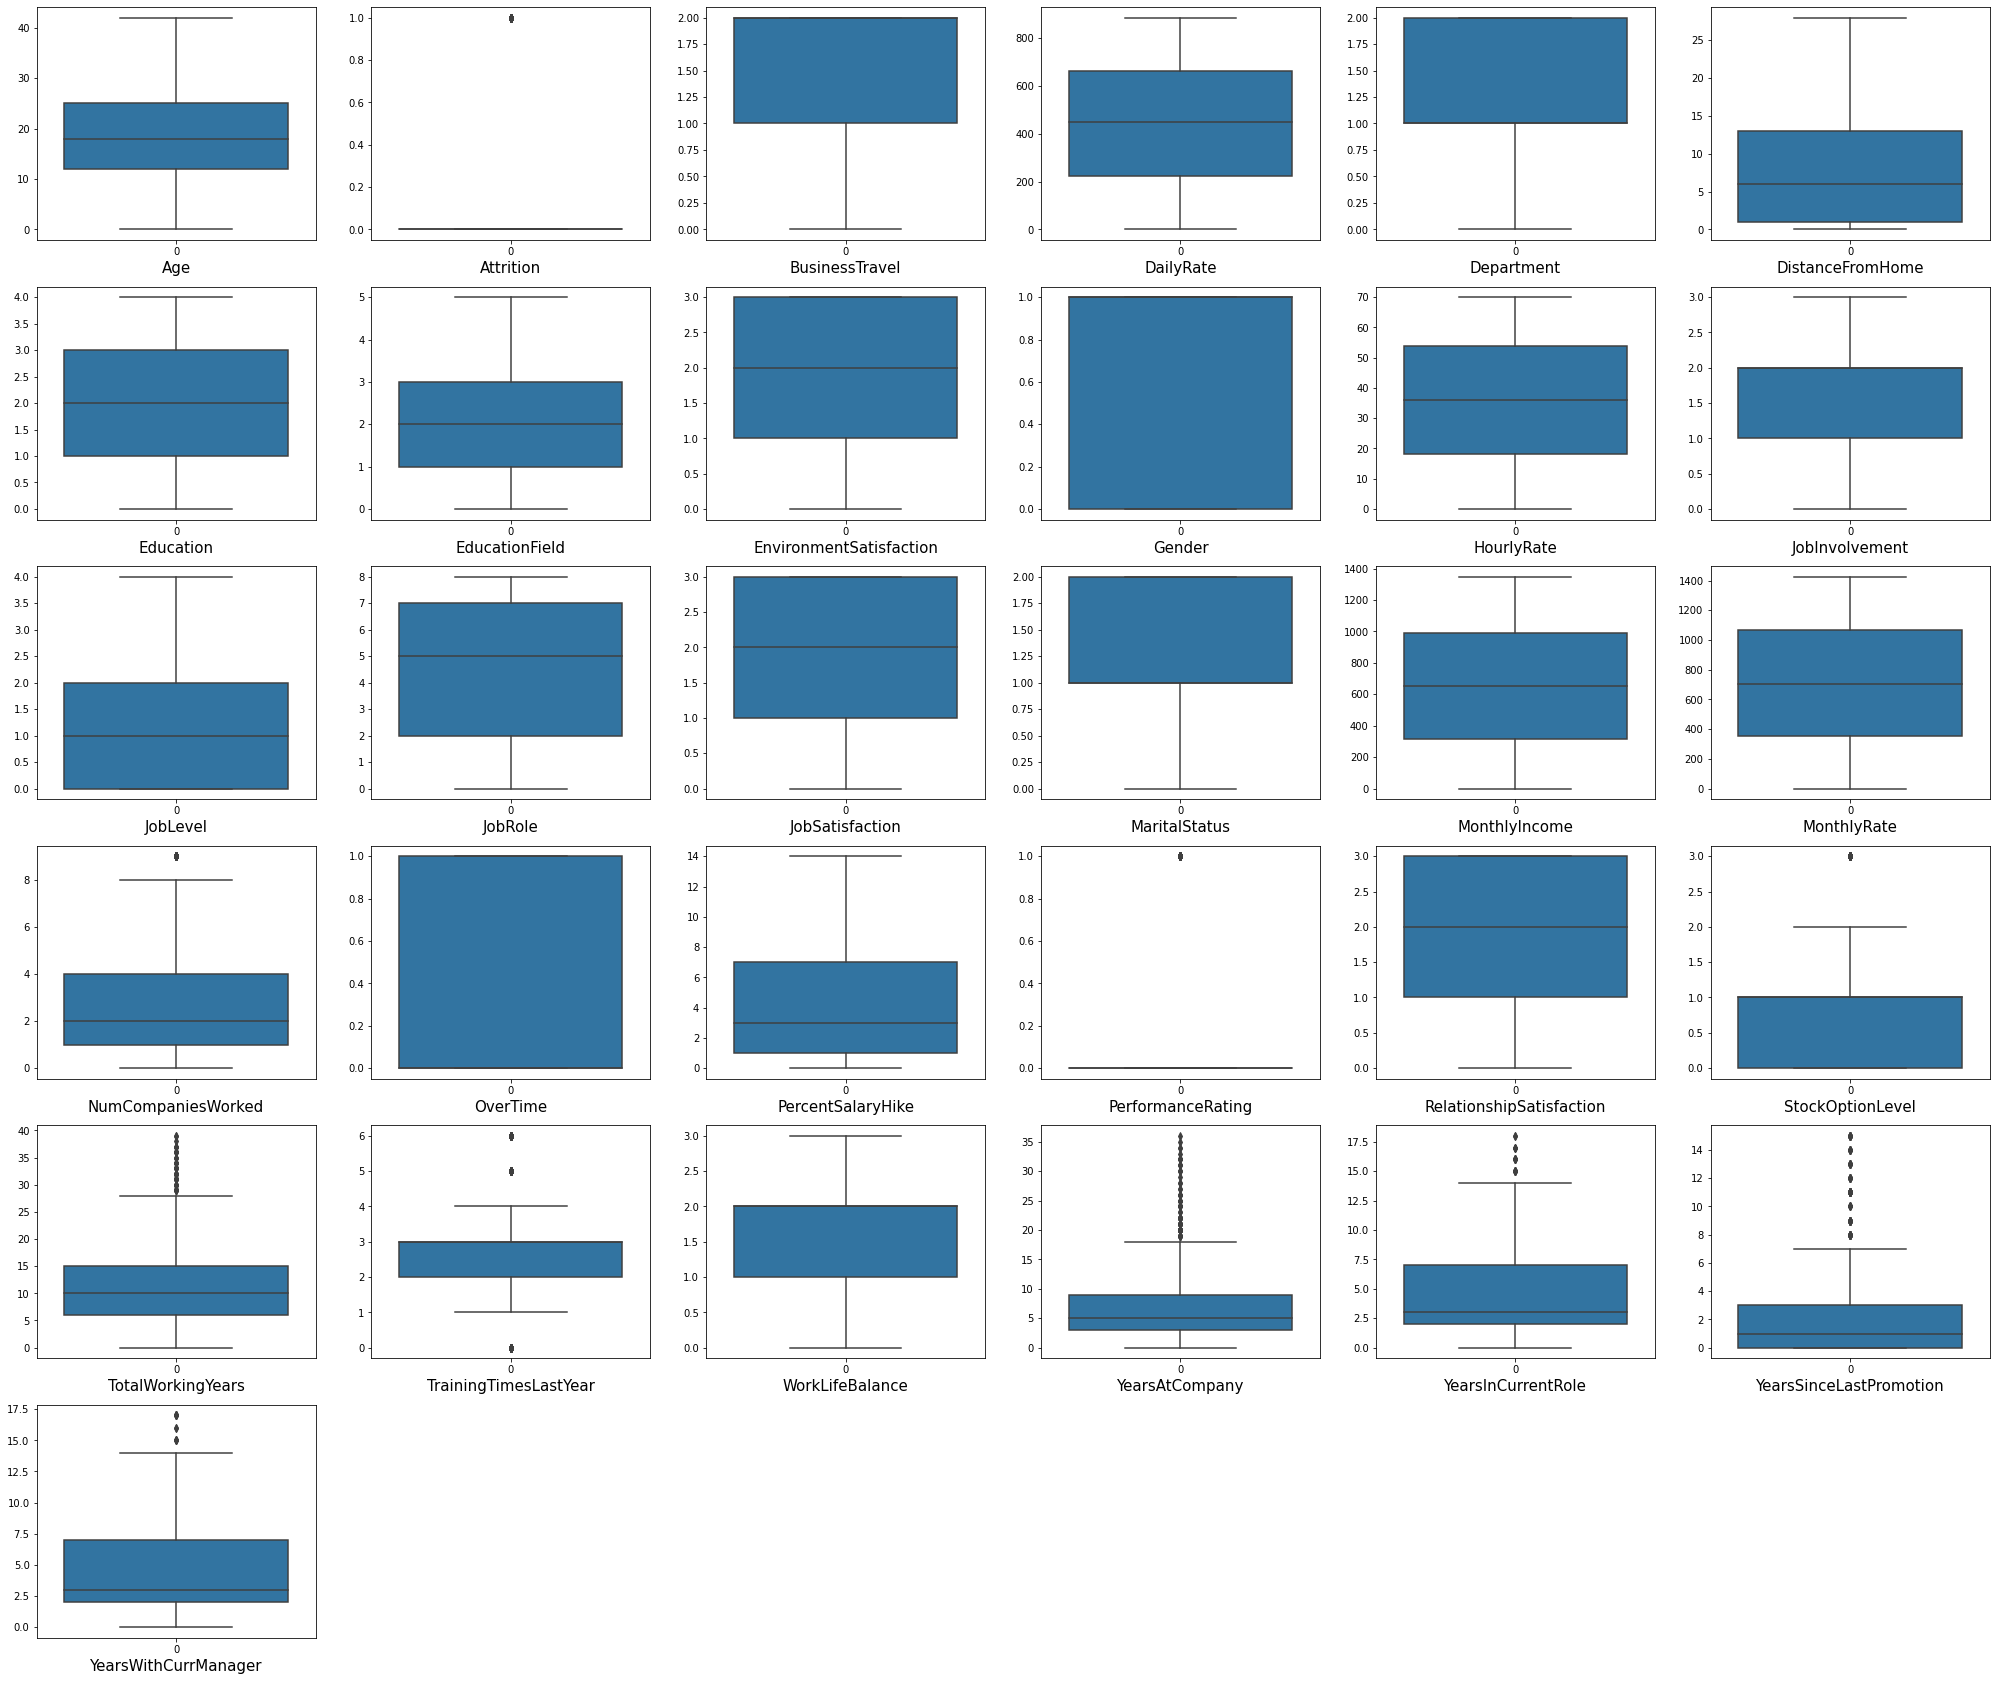

In [27]:
#Checking for the outliers
plt.figure(figsize=(35,30))
graph=1

for column in data_1:
    if graph<=36:
        ax=plt.subplot(6,6,graph)
        sns.boxplot(data = data_1[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

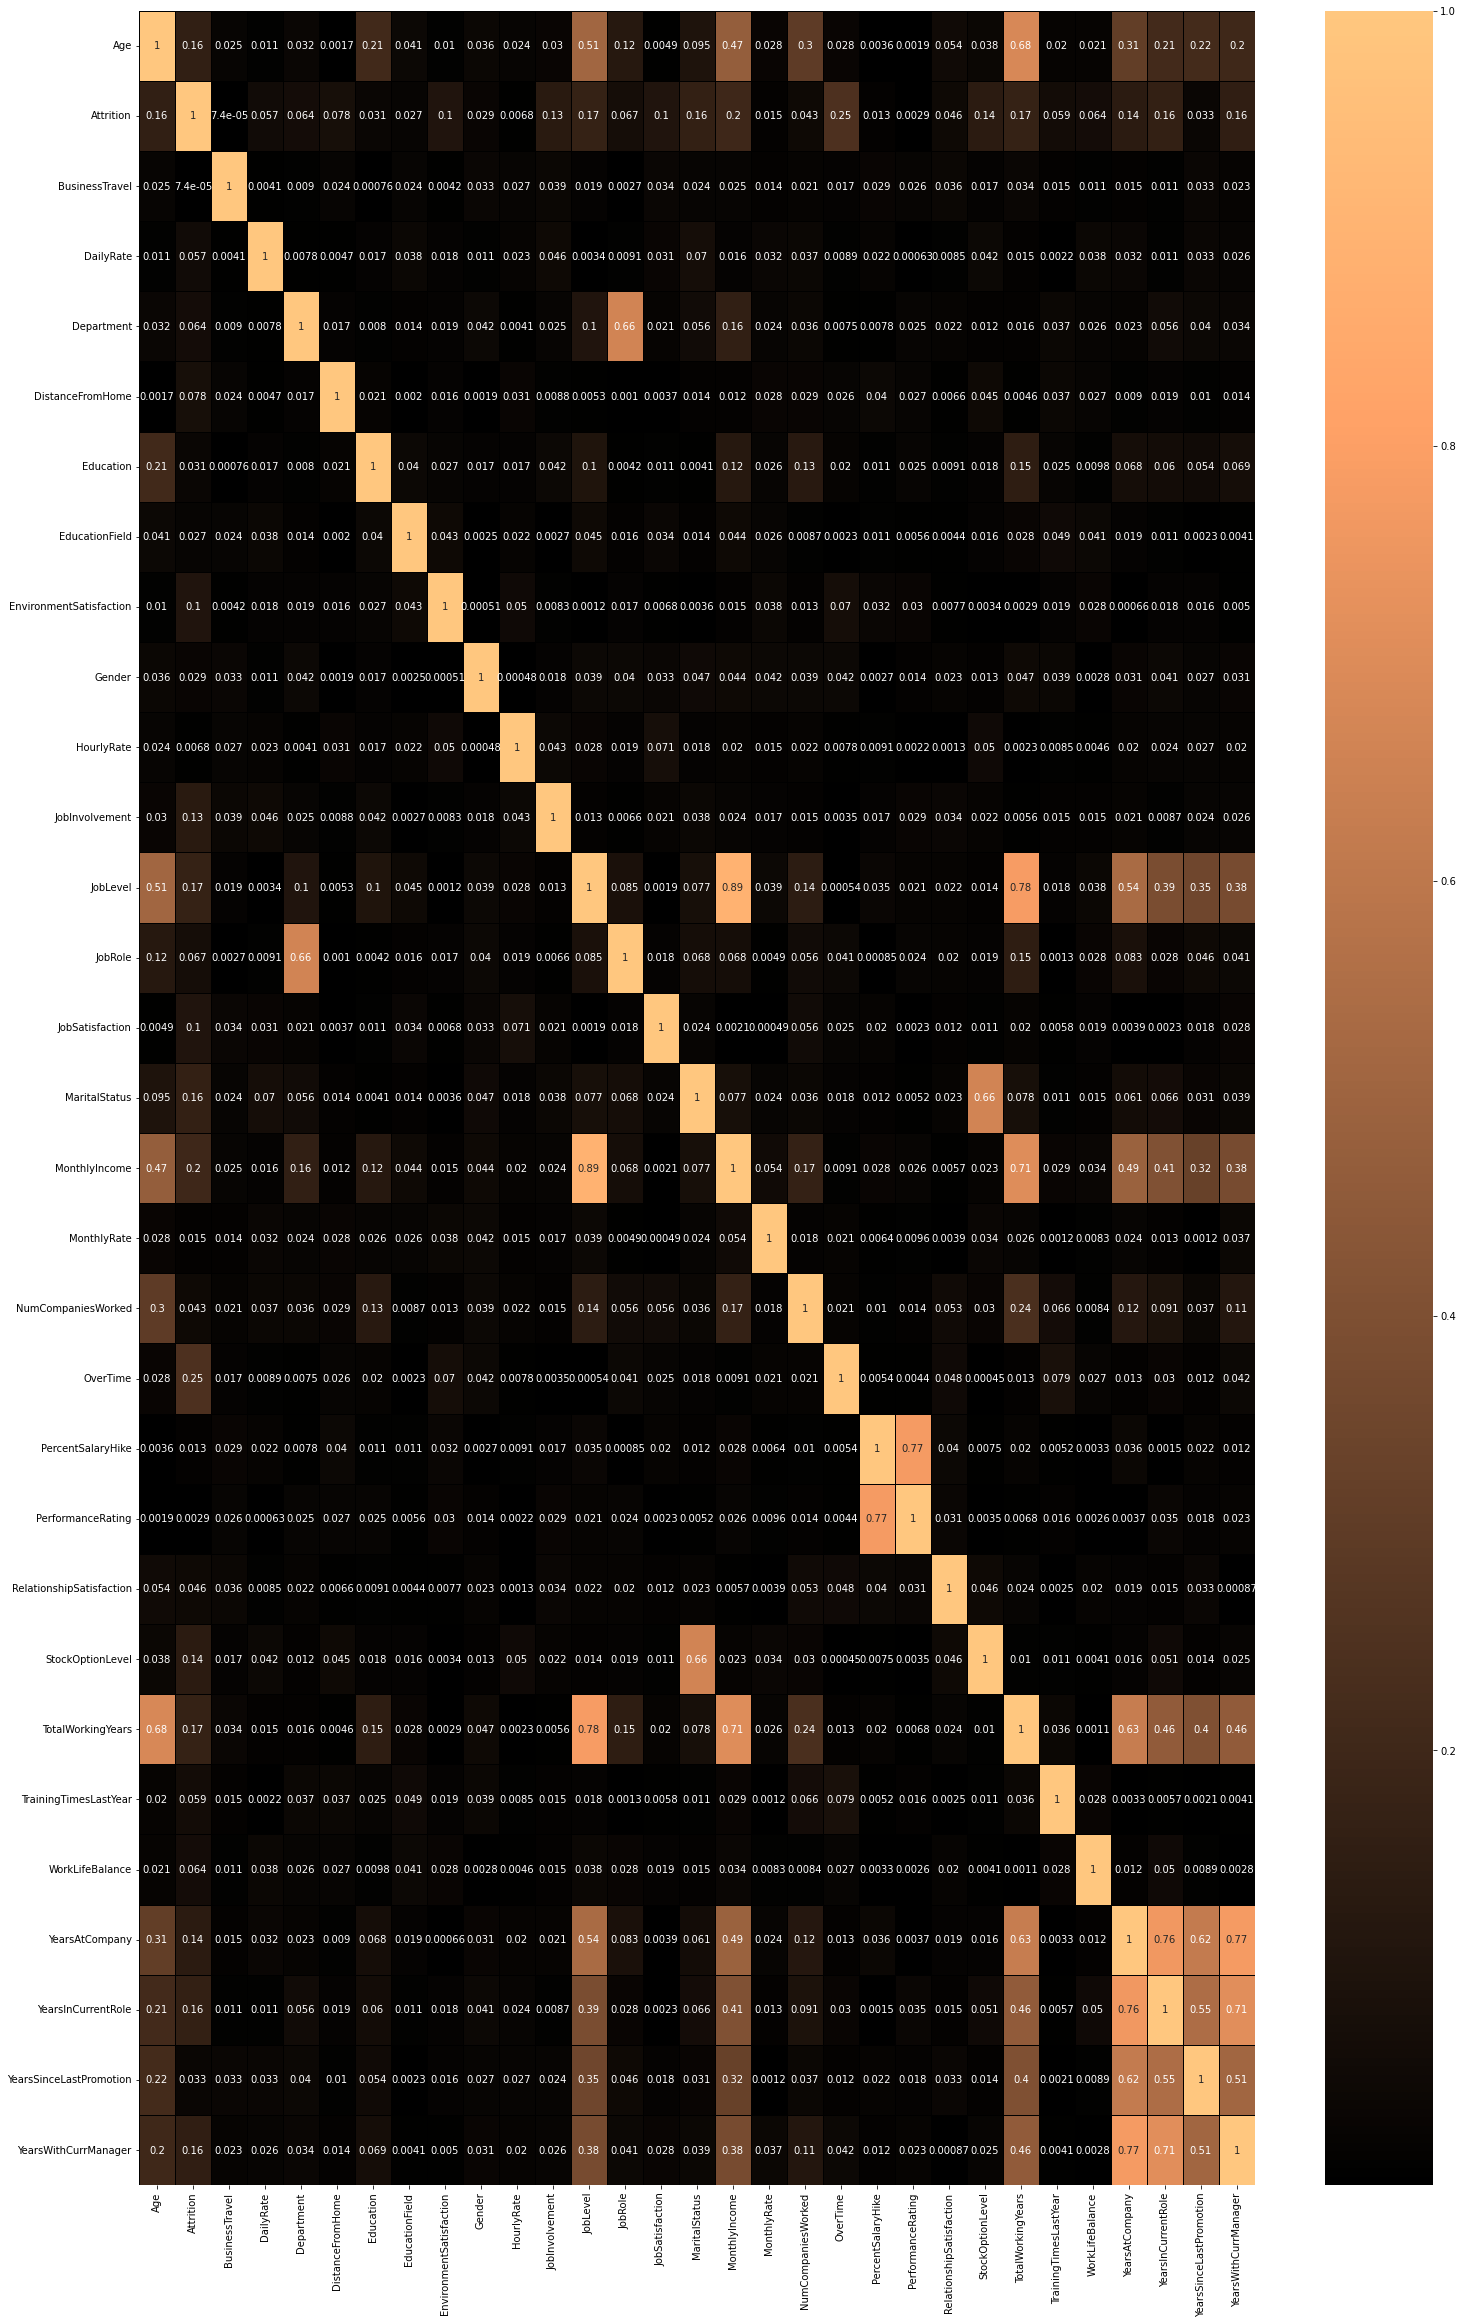

In [28]:
# Heat Map
plt.figure(figsize=(25,40))
sns.heatmap(abs(data_1.corr()),annot=True,cmap='copper',linecolor='black',linewidths=0.5)
plt.show

Job role is correlated with departent , job level is positively correlated with monthlyincome and totalworkingyear, total working year is correlated with Age, job level,monhtly income. year of complany correlated with year at current role and yearwith current manager so we will remove Job role,job level and year at company

In [29]:
data_1.drop(columns =["YearsAtCompany","JobLevel","JobRole", "TotalWorkingYears","TotalWorkingYears","PercentSalaryHike"],axis =1,inplace = True)

In [30]:
data_1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23.0,1.0,2.0,624.0,2.0,0.0,1.0,1.0,1.0,0.0,...,8.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0
1,31.0,0.0,1.0,113.0,1.0,7.0,0.0,1.0,2.0,1.0,...,1.0,0.0,1.0,3.0,1.0,3.0,2.0,7.0,1.0,7.0
2,19.0,1.0,2.0,805.0,1.0,1.0,1.0,4.0,3.0,1.0,...,6.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0
3,15.0,0.0,1.0,820.0,1.0,2.0,3.0,1.0,3.0,0.0,...,1.0,1.0,0.0,2.0,0.0,3.0,2.0,7.0,3.0,0.0
4,9.0,0.0,2.0,312.0,1.0,1.0,0.0,3.0,0.0,1.0,...,9.0,0.0,0.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18.0,0.0,1.0,494.0,1.0,22.0,1.0,3.0,2.0,1.0,...,4.0,0.0,0.0,2.0,1.0,3.0,2.0,2.0,0.0,3.0
1466,21.0,0.0,2.0,327.0,1.0,5.0,0.0,3.0,3.0,1.0,...,4.0,0.0,0.0,0.0,1.0,5.0,2.0,7.0,1.0,7.0
1467,9.0,0.0,2.0,39.0,1.0,3.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,3.0
1468,31.0,0.0,1.0,579.0,2.0,1.0,2.0,3.0,3.0,1.0,...,2.0,0.0,0.0,3.0,0.0,3.0,1.0,6.0,0.0,8.0


# Removing imbalance data

In [38]:
# Seprating data into X and y
X = data_1.drop("Attrition",axis =1)
y = data_1["Attrition"]

In [42]:
# implementing oversampling for handling imbalance data
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 40)
res_X,res_y = smote.fit_resample(X,y)

We have overcome with the imbalancing issue

# Modelling

In [45]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,2.125136,1.591746,-0.426230,-1.584178,-0.932014,-2.171982,-2.493820,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,-0.678049,-0.628241,2.346151,1.191438,0.241988,0.155707,0.338096,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,1.324226,1.591746,-0.426230,-0.658973,-0.932014,0.155707,0.338096,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.678049,1.591746,-0.426230,0.266233,-0.932014,0.155707,0.338096,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,2.525591,-0.628241,-0.426230,1.191438,0.241988,0.155707,0.338096,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.200946,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,0.523316,-0.628241,-0.426230,0.266233,0.241988,0.155707,0.338096,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.458021,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,0.523316,-0.628241,-0.426230,-1.584178,0.241988,1.707500,0.338096,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.594443,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,-0.678049,1.591746,2.346151,-0.658973,0.241988,-2.171982,0.338096,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.536349,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.277594,-0.628241,-0.426230,1.191438,-0.932014,0.155707,-1.077862,0.488900,-0.679146,1.086895


In [54]:
for i in range(50,500,75):
    RF = RandomForestClassifier()
    X_train,X_test,y_train,y_test = train_test_split(res_X,res_y,test_size = 0.2, random_state=i)
    RF.fit(X_train,y_train)
    print("training score: ",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("Test score: ",RF.score(X_test,y_test),"Random_state",i)
    print("Accuracy :",accuracy_score(pred,y_test))
    print("Roc_auc_score :",roc_auc_score(pred,y_test))
    print("confuion_matrix", "\n",confusion_matrix(pred,y_test))
    print("classification_report", "\n",classification_report(pred,y_test))

training score:  1.0 Random_state 50
Test score:  0.913135593220339 Random_state 50
Accuracy : 0.913135593220339
Roc_auc_score : 0.9176705370101597
confuion_matrix 
 [[227  33]
 [  8 204]]
classification_report 
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.92       260
         1.0       0.86      0.96      0.91       212

    accuracy                           0.91       472
   macro avg       0.91      0.92      0.91       472
weighted avg       0.92      0.91      0.91       472

training score:  1.0 Random_state 125
Test score:  0.9322033898305084 Random_state 125
Accuracy : 0.9322033898305084
Roc_auc_score : 0.9365562745844436
confuion_matrix 
 [[231  28]
 [  4 209]]
classification_report 
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.94       259
         1.0       0.88      0.98      0.93       213

    accuracy                           0.93       472
   macro avg       0.93  

In [55]:
models = [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier()]
for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(res_X,res_y,test_size = 0.2, random_state=275)
    model.fit(X_train1,y_train1)
    print("training score: ",model.score(X_train1,y_train1),"Model",model)
    pred = model.predict(X_test1)
    print("Test score: ",RF.score(X_test1,y_test1))
    print("Accuracy :",accuracy_score(pred,y_test1))
    print("Roc_auc_score :",roc_auc_score(pred,y_test1))
    print("confuion_matrix", "\n",confusion_matrix(pred,y_test1))
    print("classification_report", "\n",classification_report(pred,y_test1))

training score:  0.7250530785562632 Model LogisticRegression()
Test score:  0.9851694915254238
Accuracy : 0.7351694915254238
Roc_auc_score : 0.7351694915254238
confuion_matrix 
 [[180  56]
 [ 69 167]]
classification_report 
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74       236
         1.0       0.75      0.71      0.73       236

    accuracy                           0.74       472
   macro avg       0.74      0.74      0.73       472
weighted avg       0.74      0.74      0.73       472

training score:  1.0 Model RandomForestClassifier()
Test score:  0.9851694915254238
Accuracy : 0.9279661016949152
Roc_auc_score : 0.9334141102605055
confuion_matrix 
 [[243  28]
 [  6 195]]
classification_report 
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.93       271
         1.0       0.87      0.97      0.92       201

    accuracy                           0.93       472
   macro avg    

# Grid Search CV

In [56]:
para = {"n_estimators":[100,200,300,400],
       "max_depth":[2,3,4],
       "max_features":["auto", "sqrt", "log2"]}
grid_RF = RandomForestClassifier()
grid_RF = GridSearchCV(grid_RF,para,scoring = "f1",cv =10,n_jobs = -1, verbose =2)
grid_RF.fit(X_train1,y_train1)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.8920427160272444
{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}


# cross validation

In [57]:
grid_RF = RandomForestClassifier(max_depth= 4, max_features ='log2', n_estimators =400)
for i in range(2,10):
    cross_score = cross_val_score(grid_RF,res_X,res_y,scoring = "f1",cv =i)
    print("CV",i,"mean",cross_score.mean(),"std",cross_score.std())

CV 2 mean 0.8743930785123968 std 0.04626807851239667
CV 3 mean 0.8705382673463689 std 0.09022085683351547
CV 4 mean 0.8627215528194492 std 0.13700068716668
CV 5 mean 0.8545648167519978 std 0.17679953694566197
CV 6 mean 0.8659012111239085 std 0.15937110610721747
CV 7 mean 0.8690079765905121 std 0.14171610639273438
CV 8 mean 0.8753496960273797 std 0.1333215871115895
CV 9 mean 0.8779906050749827 std 0.1336271407037238


# Model Saving

In [58]:
import pickle
grid_RF.fit(res_X,res_y)
filename = "HR_Attrition_Analytic.pkl"
with open(filename,"wb") as f:
    pickle.dump(grid_RF,f)

# Conclusion:
Dataset was very clear and does not consist of any null values . We have used different techniques for data visulations. the dataset consist of both cateogrical and numerical which was converted using encoder technique . the best model was random forest